In [1]:
import os

In [2]:
if not os.path.isfile('db2.ipynb'):
    os.system('wget https://raw.githubusercontent.com/IBM/db2-jupyter/master/db2.ipynb')

%run db2.ipynb

--2024-12-16 05:24:28--  https://raw.githubusercontent.com/IBM/db2-jupyter/master/db2.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158270 (155K) [text/plain]
Saving to: ‘db2.ipynb’

     0K .......... .......... .......... .......... .......... 32% 8.88M 0s
    50K .......... .......... .......... .......... .......... 64% 28.3M 0s
   100K .......... .......... .......... .......... .......... 97% 20.0M 0s
   150K ....                                                  100% 45.8M=0.01s

2024-12-16 05:24:28 (15.5 MB/s) - ‘db2.ipynb’ saved [158270/158270]

<>:1708: SyntaxWarning: invalid escape sequence '\s'
<>:2305: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipykernel_104800/2299624180.py:1708: SyntaxWarning: invalid escape sequence '\s'
  firstC

         Install itables if you want to enable scrolling of result sets.
Db2 Extensions Loaded. Version: 2024-09-16


In [3]:
from dotenv import dotenv_values

In [4]:
db2creds = dotenv_values('db2con.env')
%sql CONNECT CREDENTIALS db2creds

Connection successful. TESTDB @ localhost 


In [5]:
%sql SET CURRENT SCHEMA AHNAF

Command completed.


In [6]:
import pandas as pd

In [7]:
file_path = 'success.csv'  # Replace with your CSV file path

# Read the CSV file, selecting only relevant columns
# column_headers = ['QUERYID', 'APPL_ID', 'UOW_ID', 'ACTIVITY_ID', 'EXPLAIN_TIME', 'SORT_SHRHEAP_TOP', 'QUERY']
# df_success = pd.read_csv(file_path, header=None)
df_success = pd.read_csv(file_path, dtype={
    "QUERYID": int,
    "EXPLAIN_TIME": str,
    "SORT_SHRHEAP_TOP": float,
    "QUERY": str
})

In [8]:
df_success.head()

,QUERYID,APPL_ID,UOW_ID,ACTIVITY_ID,EXPLAIN_TIME,SORT_SHRHEAP_TOP,QUERY
0,1,*LOCAL.db2inst1.241204044349,4,1,2024-12-03-20.43.44.200877,66844.0,"SELECT cn.name AS company_name, lt.link AS li..."
1,2,*LOCAL.db2inst1.241204044349,12,1,2024-12-03-20.43.45.954590,66860.0,"SELECT cn.name AS company_name, lt.link AS li..."
2,3,*LOCAL.db2inst1.241204044349,20,1,2024-12-03-20.43.47.182565,66821.0,"SELECT cn.name AS company_name, lt.link AS li..."
3,4,*LOCAL.db2inst1.241204044349,28,1,2024-12-03-20.43.48.420714,66825.0,"SELECT cn.name AS company_name, lt.link AS li..."
4,5,*LOCAL.db2inst1.241204044349,36,1,2024-12-03-20.43.51.205244,38663.0,"SELECT cn.name AS company_name, lt.link AS li..."


In [21]:
# Create a list to store the Db2_ESTIMATE values
db2_estimates = []

# Iterate through each row in the dataframe
for _, row in df_success.iterrows():
    try:
        # Execute the SQL query
        estimated_sort_shrheap_top = %sql SELECT ESTIMATED_SORT_SHRHEAP_TOP FROM ACTIVITY_DB2ACTIVITIES WHERE APPL_ID = '{row['APPL_ID']}' AND UOW_ID = {row['UOW_ID']} AND ACTIVITY_ID = {row['ACTIVITY_ID']}
        
        # Extract the first value and append to the list
        db2_estimates.append(estimated_sort_shrheap_top['ESTIMATED_SORT_SHRHEAP_TOP'][0])
    except Exception as e:
        print(f"Error processing row: {row}, {e}")
        db2_estimates.append(None)  # Append None for rows where the query fails

# Add the new column to the dataframe
df_success['Db2_ESTIMATE'] = db2_estimates

In [23]:
df_success.head()

,QUERYID,APPL_ID,UOW_ID,ACTIVITY_ID,EXPLAIN_TIME,SORT_SHRHEAP_TOP,QUERY,Db2_ESTIMATE
0,1,*LOCAL.db2inst1.241204044349,4,1,2024-12-03-20.43.44.200877,66844.0,"SELECT cn.name AS company_name, lt.link AS li...",66835
1,2,*LOCAL.db2inst1.241204044349,12,1,2024-12-03-20.43.45.954590,66860.0,"SELECT cn.name AS company_name, lt.link AS li...",66835
2,3,*LOCAL.db2inst1.241204044349,20,1,2024-12-03-20.43.47.182565,66821.0,"SELECT cn.name AS company_name, lt.link AS li...",66837
3,4,*LOCAL.db2inst1.241204044349,28,1,2024-12-03-20.43.48.420714,66825.0,"SELECT cn.name AS company_name, lt.link AS li...",66835
4,5,*LOCAL.db2inst1.241204044349,36,1,2024-12-03-20.43.51.205244,38663.0,"SELECT cn.name AS company_name, lt.link AS li...",38565


In [22]:
df_success.shape

(2332, 8)

In [24]:
df_success.columns

Index(['QUERYID', 'APPL_ID', 'UOW_ID', 'ACTIVITY_ID', 'EXPLAIN_TIME',
       'SORT_SHRHEAP_TOP', 'QUERY', 'Db2_ESTIMATE'],
      dtype='object')

In [25]:
df_success = df_success[['QUERYID', 'APPL_ID', 'UOW_ID', 'ACTIVITY_ID', 'EXPLAIN_TIME',
       'SORT_SHRHEAP_TOP', 'Db2_ESTIMATE', 'QUERY']]

In [26]:
df_success.head()

,QUERYID,APPL_ID,UOW_ID,ACTIVITY_ID,EXPLAIN_TIME,SORT_SHRHEAP_TOP,Db2_ESTIMATE,QUERY
0,1,*LOCAL.db2inst1.241204044349,4,1,2024-12-03-20.43.44.200877,66844.0,66835,"SELECT cn.name AS company_name, lt.link AS li..."
1,2,*LOCAL.db2inst1.241204044349,12,1,2024-12-03-20.43.45.954590,66860.0,66835,"SELECT cn.name AS company_name, lt.link AS li..."
2,3,*LOCAL.db2inst1.241204044349,20,1,2024-12-03-20.43.47.182565,66821.0,66837,"SELECT cn.name AS company_name, lt.link AS li..."
3,4,*LOCAL.db2inst1.241204044349,28,1,2024-12-03-20.43.48.420714,66825.0,66835,"SELECT cn.name AS company_name, lt.link AS li..."
4,5,*LOCAL.db2inst1.241204044349,36,1,2024-12-03-20.43.51.205244,38663.0,38565,"SELECT cn.name AS company_name, lt.link AS li..."


In [27]:
df_success.describe()

,QUERYID,UOW_ID,ACTIVITY_ID,SORT_SHRHEAP_TOP,Db2_ESTIMATE
count,2332.000000,2332.000000,2332.0,2332.000000,2332.000000
mean,1166.500000,9328.000000,1.0,39557.090480,43749.355918
std,673.334736,5386.677888,0.0,23505.936789,21216.006026
min,1.000000,4.000000,1.0,3876.000000,9951.000000
25%,583.750000,4666.000000,1.0,14176.000000,23455.000000
50%,1166.500000,9328.000000,1.0,39030.000000,38358.500000
75%,1749.250000,13990.000000,1.0,66821.000000,66821.000000
max,2332.000000,18652.000000,1.0,67512.000000,142997.000000


In [28]:
print(df_success[['SORT_SHRHEAP_TOP', 'Db2_ESTIMATE']].describe())

       SORT_SHRHEAP_TOP   Db2_ESTIMATE
count       2332.000000    2332.000000
mean       39557.090480   43749.355918
std        23505.936789   21216.006026
min         3876.000000    9951.000000
25%        14176.000000   23455.000000
50%        39030.000000   38358.500000
75%        66821.000000   66821.000000
max        67512.000000  142997.000000


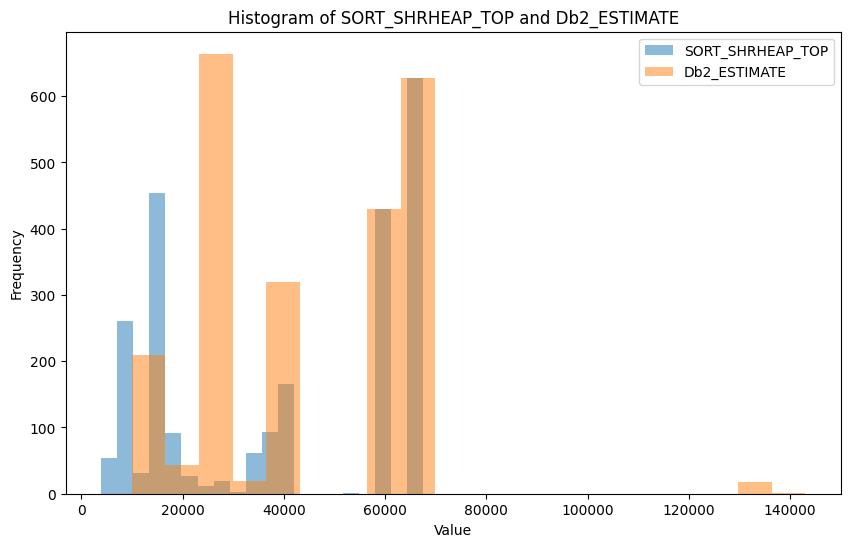

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_success['SORT_SHRHEAP_TOP'], bins=20, alpha=0.5, label='SORT_SHRHEAP_TOP')
plt.hist(df_success['Db2_ESTIMATE'], bins=20, alpha=0.5, label='Db2_ESTIMATE')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of SORT_SHRHEAP_TOP and Db2_ESTIMATE')
plt.legend()
plt.show()


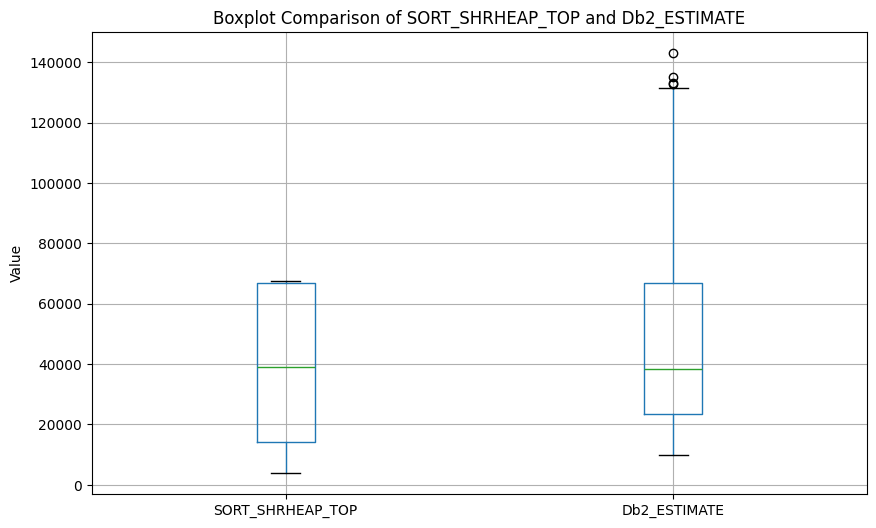

In [30]:
# Boxplot
plt.figure(figsize=(10, 6))
df_success[['SORT_SHRHEAP_TOP', 'Db2_ESTIMATE']].boxplot()
plt.title('Boxplot Comparison of SORT_SHRHEAP_TOP and Db2_ESTIMATE')
plt.ylabel('Value')
plt.show()


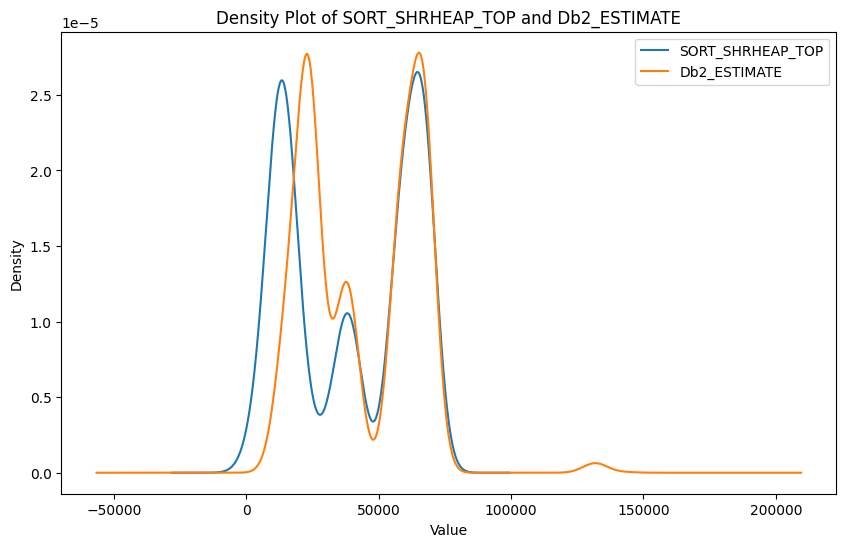

In [31]:
# Density plot (KDE)
df_success['SORT_SHRHEAP_TOP'].plot(kind='kde', label='SORT_SHRHEAP_TOP', figsize=(10, 6))
df_success['Db2_ESTIMATE'].plot(kind='kde', label='Db2_ESTIMATE')
plt.xlabel('Value')
plt.title('Density Plot of SORT_SHRHEAP_TOP and Db2_ESTIMATE')
plt.legend()
plt.show()


In [32]:
df_success.head()

,QUERYID,APPL_ID,UOW_ID,ACTIVITY_ID,EXPLAIN_TIME,SORT_SHRHEAP_TOP,Db2_ESTIMATE,QUERY
0,1,*LOCAL.db2inst1.241204044349,4,1,2024-12-03-20.43.44.200877,66844.0,66835,"SELECT cn.name AS company_name, lt.link AS li..."
1,2,*LOCAL.db2inst1.241204044349,12,1,2024-12-03-20.43.45.954590,66860.0,66835,"SELECT cn.name AS company_name, lt.link AS li..."
2,3,*LOCAL.db2inst1.241204044349,20,1,2024-12-03-20.43.47.182565,66821.0,66837,"SELECT cn.name AS company_name, lt.link AS li..."
3,4,*LOCAL.db2inst1.241204044349,28,1,2024-12-03-20.43.48.420714,66825.0,66835,"SELECT cn.name AS company_name, lt.link AS li..."
4,5,*LOCAL.db2inst1.241204044349,36,1,2024-12-03-20.43.51.205244,38663.0,38565,"SELECT cn.name AS company_name, lt.link AS li..."


In [33]:
df_success.to_csv('success_db2_est.csv', index=False)